<a href="https://colab.research.google.com/github/johanpowereng/belajar-machine-learning/blob/main/Deviation_FW_MS_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing the required libraries for EDA

In [5]:
import pandas as pd
import xlrd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

# 2. Loading the data into the data frame.

In [44]:
df = pd.read_excel("Deviation FW-MS 2024.xlsx")
# To display the top 5 rows
df.head(5)

,Time,MW,Coal Flow,MW Net,MS Flow,FW Flow,SB Press,Dev FW-MS
0,2024-03-01 10:00:00,631.57,367.77,601.78,1921.15,1982.49,0.13,61.3
1,2024-03-01 10:05:00,631.37,366.97,601.49,1917.90,1974.49,0.13,56.6
2,2024-03-01 10:10:00,631.89,365.43,601.59,1917.22,1962.79,0.13,45.6
3,2024-03-01 10:15:00,631.90,366.03,601.51,1916.88,1966.62,0.14,49.7
4,2024-03-01 10:20:00,631.83,369.47,601.34,1921.18,1981.89,0.14,60.7


In [45]:
df.tail(5)                        # To display the botton 5 rows

,Time,MW,Coal Flow,MW Net,MS Flow,FW Flow,SB Press,Dev FW-MS
71971,2024-12-18 07:35:00,634.62,360.37,605.53,1910.23,2019.49,0.13,109.3
71972,2024-12-18 07:40:00,633.64,359.48,604.43,1905.95,2012.59,0.13,106.6
71973,2024-12-18 07:45:00,633.50,358.54,604.40,1904.58,2007.21,0.13,102.6
71974,2024-12-18 07:50:00,632.92,357.86,603.94,1902.66,2005.82,0.14,103.2
71975,2024-12-18 07:55:00,633.41,358.01,604.50,1903.89,2002.57,0.14,98.7


# 3. Checking the types of data

In [46]:
df.dtypes

,0
Time,datetime64[ns]
MW,float64
Coal Flow,float64
MW Net,float64
MS Flow,float64
FW Flow,float64
SB Press,float64
Dev FW-MS,float64


# 4. Dropping irrelevant columns

In [47]:
df = df.drop(['Coal Flow','MW Net','MS Flow','FW Flow'], axis=1)
df.head(5)

,Time,MW,SB Press,Dev FW-MS
0,2024-03-01 10:00:00,631.57,0.13,61.3
1,2024-03-01 10:05:00,631.37,0.13,56.6
2,2024-03-01 10:10:00,631.89,0.13,45.6
3,2024-03-01 10:15:00,631.90,0.14,49.7
4,2024-03-01 10:20:00,631.83,0.14,60.7


# 5. Renaming the columns

In [48]:
df = df.rename(columns={"MW": "Gross MW", "Time": "Date-Time" })
df.head(5)

,Date-Time,Gross MW,SB Press,Dev FW-MS
0,2024-03-01 10:00:00,631.57,0.13,61.3
1,2024-03-01 10:05:00,631.37,0.13,56.6
2,2024-03-01 10:10:00,631.89,0.13,45.6
3,2024-03-01 10:15:00,631.90,0.14,49.7
4,2024-03-01 10:20:00,631.83,0.14,60.7


# 6. Dropping the duplicate rows

In [49]:
df.shape

(71976, 4)

In [30]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


# 7. Dropping the missing or null values.

In [85]:
print(df.isnull().sum())
df.count()

Date-Time    0
Gross MW     0
SB Press     0
Dev FW-MS    0
dtype: int64


,0
Date-Time,71976
Gross MW,71976
SB Press,71976
Dev FW-MS,71976


# 8. Detecting Outliers

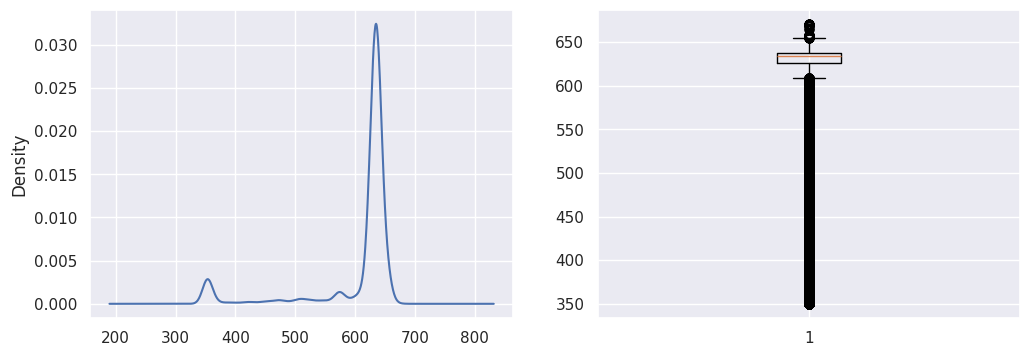

In [32]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Gross MW'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Gross MW'])
plt.show()

<Axes: xlabel='Gross MW'>

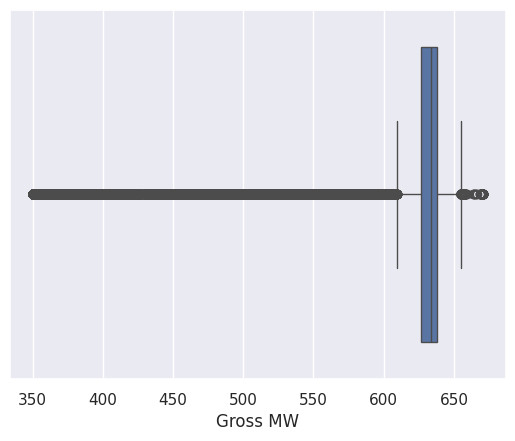

In [34]:
sns.boxplot(x=df['Gross MW'])

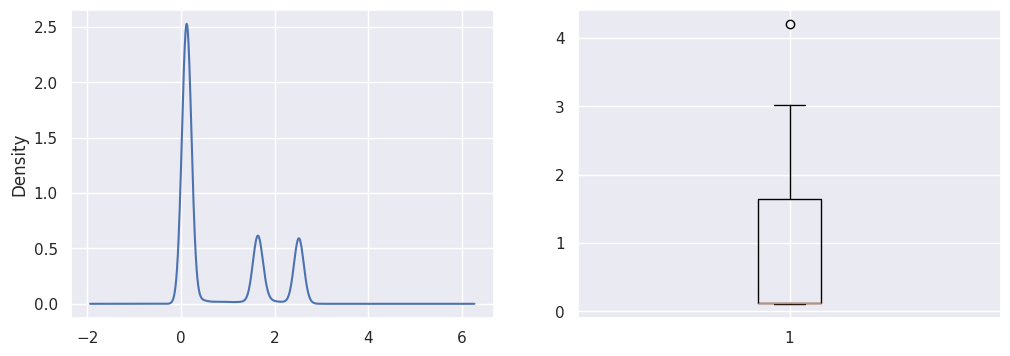

In [35]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['SB Press'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['SB Press'])
plt.show()

# 7. Dropping Data during Sootblow in process (SB <0.3).

In [101]:
SB= df[ (df['SB Press'] >= 0.2) ].index
df.drop(SB , inplace=True)
df.head(5)

,Date-Time,Gross MW,SB Press,Dev FW-MS
0,2024-03-01 10:00:00,631.57,0.13,61.3
1,2024-03-01 10:05:00,631.37,0.13,56.6
2,2024-03-01 10:10:00,631.89,0.13,45.6
3,2024-03-01 10:15:00,631.90,0.14,49.7
4,2024-03-01 10:20:00,631.83,0.14,60.7


In [102]:
df.count()

,0
Date-Time,46001
Gross MW,46001
SB Press,46001
Dev FW-MS,46001


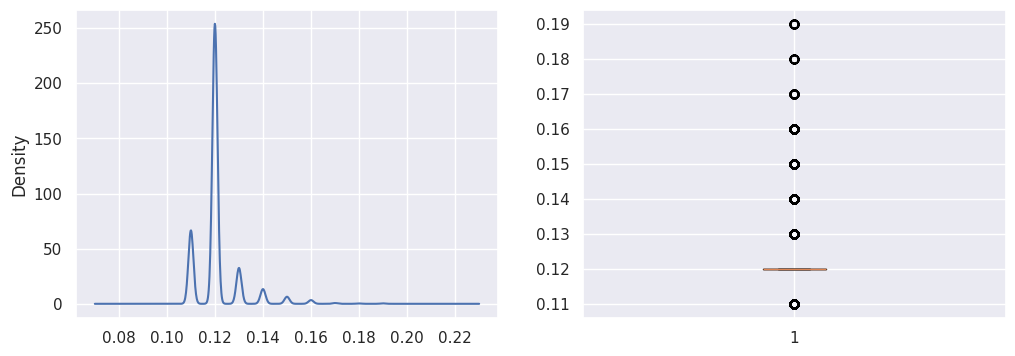

In [103]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['SB Press'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['SB Press'])
plt.show()